In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from  keras.datasets import mnist
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


3


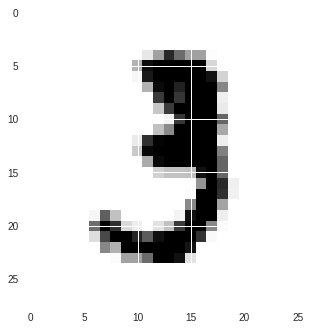

In [2]:
(y_train, x_train), (y_test, x_test) = mnist.load_data()

plt.imshow(y_train[10])
print(x_train[10])

y_train = y_train.reshape(y_train.shape[0], 28, 28, 1)
y_test = y_test.reshape(y_test.shape[0], 28, 28, 1)

nepochs = 50
b_size = 512

rnum = np.random.rand(60000,784)

In [0]:
from keras.layers import Input, Dense, Conv2D, Dropout, UpSampling2D, UpSampling1D, Reshape
from keras.models import Model
from keras.optimizers import RMSprop

In [4]:
a = Input(shape=(784,))
b = Input(shape=(1,))

x1 = Dense(64, activation='relu')(a)
x1 = keras.layers.Dropout(0.25)(x1)
out_a = Dense(256, activation='relu')(x1)

x2 = keras.layers.Dense(64, activation='relu')(b)
x2 = keras.layers.Dropout(0.25)(x2)
out_b = keras.layers.Dense(256, activation='softmax')(x2)

concatenated = keras.layers.concatenate([out_a, out_b])

x = keras.layers.Dense(784, activation='relu')(concatenated)
x = keras.layers.Dense(784, activation='relu')(x)
x = keras.layers.Dense(784, activation='relu')(x)
x = keras.layers.Reshape((28,28,1))(x)
#x = keras.layers.Conv2D(32,(3,3),strides=(2,2), activation = 'relu')(x)
#x = keras.layers.Conv2D(1,(3,3),strides=(1,1), activation = 'relu')(x)

model = Model(inputs = [a,b], outputs = x)

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           50240       input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)      

In [0]:
model.compile(loss='mean_squared_error',
              optimizer = RMSprop())

In [6]:
hist = model.fit( [rnum, x_train], y_train, epochs=nepochs, batch_size=b_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 4781.5305
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 4664.9063
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 4636.6020
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 4624.0262
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 4611.1068
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 4592.9438
Epoch 7/50
60000/60000 [==============================] - 2s 26us/step - loss: 4534.8964
Epoch 8/50
60000/60000 [==============================] - 2s 26us/step - loss: 4483.0491
Epoch 9/50
60000/60000 [==============================] - 2s 26us/step - loss: 4467.0458
Epoch 10/50
60000/60000 [==============================] - 2s 26us/step - loss: 4451.0819
Epoch 11/50
60000/60000 [==============================] - 2s

In [7]:
rnum2 = np.random.rand(10000,784)
score = model.evaluate([rnum2,x_test],y_test, batch_size = 1)
score

10000/10000 [==============================] - 14s 1ms/step


3812.4368978515627

[[3]]


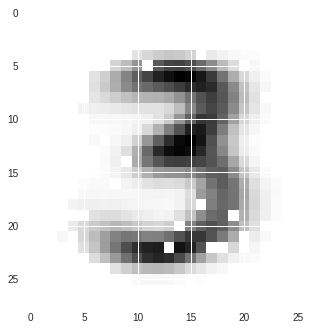

In [8]:
pred = 3

rnum3 = np.random.rand(1,784)
n = x_test[11].reshape(1, 1)
n[0][0] = pred

img = model.predict(x=[rnum3,n])
img = img.reshape(28,28)
plt.imshow(img)
print(n)